In [ ]:
import sys
sys.version

'3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]'

In [ ]:
!python --version

Python 3.7.11


In [ ]:
!apt-get install python3.8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.8 is already the newest version (3.8.11-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!pip install -q snscrape

In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
today = date.today()
end_date = today
print(end_date)

2021-08-19


In [ ]:
search_term = 'Twitter ban, Nigeria government'
from_date = '2020-01-01'

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size
print('Number of Tweets : '+str(counter))

Number of Tweets : 4810


In [ ]:
max_results = 2000  

In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(0, "@SaharaReporters @MBuhari @Twitter @Twitter @jack  Do not listen to any negotiation with Nigerian officials as regards the ban and pls don't open any office in Nigeria if you don't want to be bullied by a government that do no regard Rule of Law. They banned it, they need it now, They'll unban it themselves.")
(1, "@Chiora__ Buh ora:\\n- First it was the crypto ban\\n- Ban of sending money from abroad direct into naira accounts\\n- Twitter ban\\n- Now, they have issues with domicillary US accounts in Nigeria?\\n\\nThat's an oprressive government.")
(2, "A number of civil rights organisations took the Nigerian government to court following the ban but this didn't exactly work because Twitter is still illegal in Nigeria and president Buhari is still the president. \\n\\nhttps://t.co/kB2PsDtQea")
(3, "'Can the federal government of Nigeria lift the Twitter ban already 🙅\\u200d♂️'")
(4, "@Chikaicarr Please, say your government (Nigeria)  has ruined business and not the Twitter. Don't 

In [ ]:
df.columns

Index(['content'], dtype='object')

In [ ]:
df['content']

0       @SaharaReporters @MBuhari @Twitter @Twitter @j...
1       @Chiora__ Buh ora:\n- First it was the crypto ...
2       A number of civil rights organisations took th...
3       'Can the federal government of Nigeria lift th...
4       @Chikaicarr Please, say your government (Niger...
                              ...                        
1959    Repressione totale BBC News - Nigeria's Twitte...
1960    Here in Nigeria we have a government that don'...
1961    Nigeria government have ban Twitter now..\nWe ...
1962    'UNITED STATES MISSION CAUTIONS NIGERIAN GOVER...
1963                   'Unpopular opinion:\n To be honest
Name: content, Length: 1964, dtype: object

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [ ]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)

  return input_txt

In [ ]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")

In [ ]:
df.head(15)

,content,tidy_tweet
0,@SaharaReporters @MBuhari @Twitter @Twitter @j...,Do not listen to any negotiation with Ni...
1,@Chiora__ Buh ora:\n- First it was the crypto ...,Buh ora:\n- First it was the crypto ban\n- Ba...
2,A number of civil rights organisations took th...,A number of civil rights organisations took th...
3,'Can the federal government of Nigeria lift th...,'Can the federal government of Nigeria lift th...
4,"@Chikaicarr Please, say your government (Niger...","Please, say your government (Nigeria) has ru..."
5,@SaharaReporters @OkechukwuNwadi5 @Twitter @De...,Nigeria government is a terrorist org ...
6,@Afam_bu_Ekene @SaharaReporters @Twitter @Delt...,Nigeria is a terrorist government that is...
7,You cannot out-build someone who can choke you...,You cannot out-build someone who can choke you...
8,'If FG can ban Twitter in Nigeria knowing full...,'If FG can ban Twitter in Nigeria knowing full...
9,'@akinalabi As a lawmaker I was thinking you w...,' As a lawmaker I was thinking you will comply...


In [ ]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
df.head(3)

,content,tidy_tweet
0,@SaharaReporters @MBuhari @Twitter @Twitter @j...,Do not listen to any negotiation with Ni...
1,@Chiora__ Buh ora:\n- First it was the crypto ...,Buh ora n First it was the crypto ban n Ba...
2,A number of civil rights organisations took th...,A number of civil rights organisations took th...


In [ ]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
toke_tweet = df['tidy_tweet'].apply(lambda x:x.split())

In [ ]:
toke_tweet.head(4)

0    [listen, negotiation, with, Nigerian, official...
1    [First, crypto, sending, money, from, abroad, ...
2    [number, civil, rights, organisations, took, N...
3    [federal, government, Nigeria, lift, Twitter, ...
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

toke_tweet = toke_tweet.apply(lambda x: [stemmer.stem(i) for i in x ])


In [ ]:
toke_tweet.head(4)

0    [listen, negoti, with, nigerian, offici, regar...
1    [first, crypto, send, money, from, abroad, dir...
2    [number, civil, right, organis, took, nigerian...
3     [feder, govern, nigeria, lift, twitter, alreadi]
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(toke_tweet)):
  toke_tweet[i] = ' '.join(toke_tweet[i])

  df['tidy_tweet'] = toke_tweet

In [ ]:
df.head(4)

,content,tidy_tweet
0,@SaharaReporters @MBuhari @Twitter @Twitter @j...,listen negoti with nigerian offici regard open...
1,@Chiora__ Buh ora:\n- First it was the crypto ...,first crypto send money from abroad direct int...
2,A number of civil rights organisations took th...,number civil right organis took nigerian gover...
3,'Can the federal government of Nigeria lift th...,feder govern nigeria lift twitter alreadi


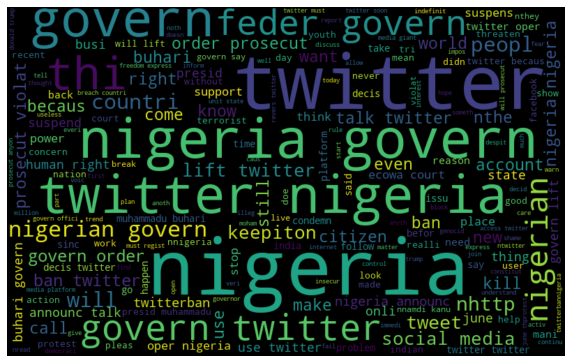

In [ ]:
all_words = ' '.join([text for text in df['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=24, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
pip install -U textblob

In [ ]:
df.dtypes

content       object
tidy_tweet    object
dtype: object

In [ ]:
from textblob import TextBlob

In [ ]:
from nltk.sentiment.util import *
df['content'] = df['content'].astype('str')
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity'] = df['content'].apply(get_polarity)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df.head(2)

,content,tidy_tweet,Polarity
0,@SaharaReporters @MBuhari @Twitter @Twitter @j...,listen negoti with nigerian offici regard open...,0.000
1,@Chiora__ Buh ora:\n- First it was the crypto ...,first crypto send money from abroad direct int...,0.175


In [ ]:

df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='Positive'
df.loc[df.Polarity==0,'Sentiment_Type']='Neutral'
df.loc[df.Polarity<0,'Sentiment_Type']='Negative'

In [ ]:
df.head(15)

,content,tidy_tweet,Polarity,Sentiment_Type
0,@SaharaReporters @MBuhari @Twitter @Twitter @j...,listen negoti with nigerian offici regard open...,0.000000,Neutral
1,@Chiora__ Buh ora:\n- First it was the crypto ...,first crypto send money from abroad direct int...,0.175000,Positive
2,A number of civil rights organisations took th...,number civil right organis took nigerian gover...,-0.083333,Negative
3,'Can the federal government of Nigeria lift th...,feder govern nigeria lift twitter alreadi,0.000000,Neutral
4,"@Chikaicarr Please, say your government (Niger...",pleas your govern nigeria ruin busi twitter kn...,-0.266667,Negative
5,@SaharaReporters @OkechukwuNwadi5 @Twitter @De...,nigeria govern terrorist that seek mean silenc...,0.150000,Positive
6,@Afam_bu_Ekene @SaharaReporters @Twitter @Delt...,nigeria terrorist govern that seek mean silenc...,0.150000,Positive
7,You cannot out-build someone who can choke you...,cannot build someon choke your airflow with or...,-0.500000,Negative
8,'If FG can ban Twitter in Nigeria knowing full...,twitter nigeria know fulli well thousand milli...,-0.093750,Negative
9,'@akinalabi As a lawmaker I was thinking you w...,lawmak think will compli thi feder govern twit...,0.281250,Positive


In [ ]:
df.tail(15)

,content,tidy_tweet,Polarity,Sentiment_Type
1949,'Nigeria na joke!\nGovernment officials/APC pa...,nigeria joke ngovern offici parti member back ...,0.00,Neutral
1950,#Nigeria's Twitter ban: Government orders pros...,#nigeria twitter govern order prosecut violat ...,0.00,Neutral
1951,'Decisions to ban twitter in Nigeria is the bi...,decis twitter nigeria biggest mistak buhari go...,0.00,Neutral
1952,'I here say Bubu government don ban Twitter op...,here bubu govern twitter oper nigeria,0.00,Neutral
1953,'Twitter Ban: Nigeria government Orders Arrest...,twitter nigeria govern order arrest prosecut t...,-0.05,Negative
1954,'Off all the things going on in this country,thing go thi countri,0.00,Neutral
1955,'I didn’t even fathom that something can be da...,didn even fathom that someth danger embarrass ...,-0.05,Negative
1956,'Twitter Ban: Your Decision Violates Fundament...,twitter your decis violat fundament freedom,0.00,Neutral
1957,'Private money in Nigeria is 20%,privat money nigeria,0.00,Neutral
1958,'Breaking: US Sends Powerful Message To Buhari...,break send power messag buhari over nigeria tw...,0.30,Positive


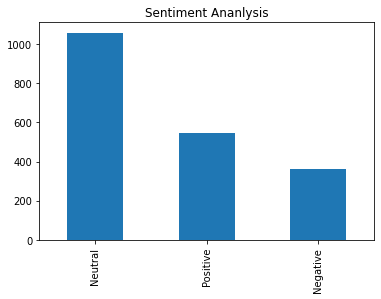

In [ ]:
df.Sentiment_Type.value_counts().plot(kind='bar', title='Sentiment Ananlysis')

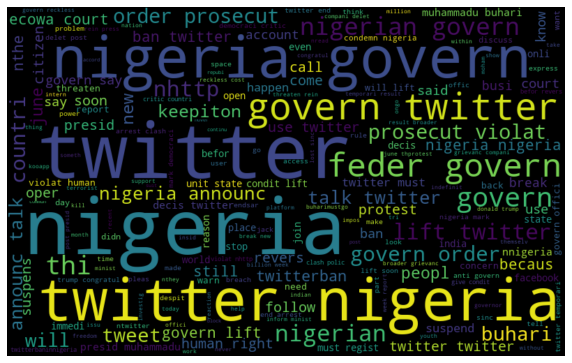

In [ ]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['Sentiment_Type'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

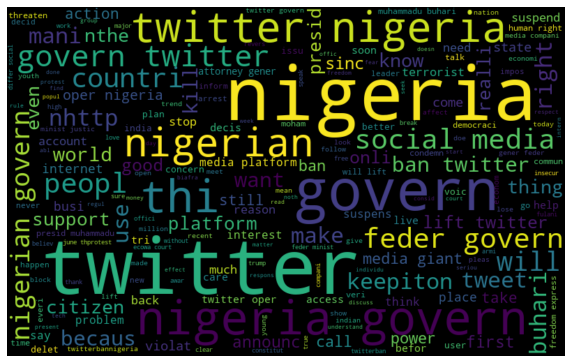

In [ ]:
positive_words =' '.join([text for text in df['tidy_tweet'][df['Sentiment_Type'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

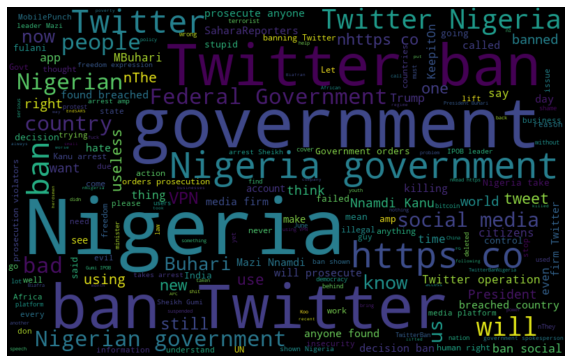

In [ ]:
negative_words =' '.join([text for text in df['content'][df['Sentiment_Type'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()